# IT496: Introduction to Data Mining
## Course Project 3
202101139 - Ayush Hirdani

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

## Delivery

In [2]:
delivery = pd.read_csv('/kaggle/input/icc-mens-world-cup-2023/deliveries.csv')
delivery.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
delivery.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [4]:
delivery.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     16949
noballs                   17338
byes                      17354
legbyes                   17263
penalty                   17379
wicket_type               16889
player_dismissed          16889
other_wicket_type         17380
other_player_dismissed    17380
dtype: int64

In [5]:
# keeping extras as 0 when normal balls are bowled
delivery[['wides', 'noballs', 'byes', 'legbyes', 'penalty']]= delivery[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0)
delivery.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                         0
noballs                       0
byes                          0
legbyes                       0
penalty                       0
wicket_type               16889
player_dismissed          16889
other_wicket_type         17380
other_player_dismissed    17380
dtype: int64

In [6]:
#creating a wicket column to get boolean of wicket fall
delivery["wicket"] = delivery["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [7]:
# filling null values as none when no wicket is taken
delivery.wicket_type.fillna("none", inplace=True)
delivery.player_dismissed.fillna("none", inplace=True)

In [8]:
delivery[delivery.other_wicket_type.notnull()]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket


In [9]:
delivery[delivery.other_player_dismissed.notnull()]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket


In [10]:
delivery.drop(['other_wicket_type', 'other_player_dismissed'], axis=1, inplace=True)

In [11]:
#creating over and balls from ball column which is in 0.1, 0.2 format for first over
delivery["ball"] = delivery["ball"].astype(str)
delivery[["over", "ball_num"]] = delivery["ball"].str.split(".", expand=True).astype(int)
delivery["ball"] = delivery["ball"].astype(float)
delivery["over"] = delivery["over"] + 1
delivery["ball_left"] = 306 - (delivery["over"]*6 + delivery["ball_num"])

In [12]:
#creating total runs column to calculate runs on each ball incusive of extras
delivery["total_runs"] = delivery["runs_off_bat"] + delivery["extras"]

In [13]:
delivery.isnull().sum()

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
wicket              0
over                0
ball_num            0
ball_left           0
total_runs          0
dtype: int64

In [14]:
delivery.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'wicket', 'over',
       'ball_num', 'ball_left', 'total_runs'],
      dtype='object')

In [15]:
#creating innings df so we can merger total runs for each innings with in original df
innings = delivery.groupby(["match_id", "innings"])["total_runs"].sum().reset_index()
innings.rename(columns={"total_runs":"innings_total"}, inplace=True)

In [16]:
delivery.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,wicket,over,ball_num,ball_left,total_runs
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,none,none,0,1,1,299,0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,none,none,0,1,2,298,6
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,none,none,0,1,3,297,1
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0.0,0.0,0.0,none,none,0,1,4,296,1
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,0.0,none,none,0,1,5,295,4


In [17]:
#creating deliveries df and adding total runs
data = delivery.merge(innings, on=["match_id", "innings"])
data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,legbyes,penalty,wicket_type,player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,1,299,0,282
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,2,298,6,282
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,3,297,1,282
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0.0,0.0,none,none,0,1,4,296,1,282
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,5,295,4,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,...,0.0,0.0,none,none,0,35,5,91,0,167
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,...,0.0,0.0,none,none,0,35,6,90,0,167
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,...,0.0,0.0,none,none,0,36,1,89,0,167
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,...,0.0,0.0,none,none,0,36,2,88,6,167


---

## Batsman Sixes

In [18]:
teams = data.batting_team.unique()
teams

array(['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [19]:
team_squad = {}

for team in teams:
    # Extract strikers
    player_list1 = data[data['batting_team'] == team]['striker'].unique().tolist()
    player_list2 = data[data['batting_team'] == team]['non_striker'].unique().tolist()
    # Assign the combined list to the team in the dictionary
    team_squad[team] = list(set(player_list1).union(set(player_list2)))

print([(team, value) for (team, value) in team_squad.items()])


[('England', ['DJ Malan', 'MA Wood', 'AU Rashid', 'JC Buttler', 'MM Ali', 'RJW Topley', 'JE Root', 'SM Curran', 'BA Stokes', 'HC Brook', 'AAP Atkinson', 'DJ Willey', 'CR Woakes', 'LS Livingstone', 'JM Bairstow']), ('New Zealand', ['DJ Mitchell', 'MS Chapman', 'WA Young', 'TWM Latham', 'R Ravindra', 'JDS Neesham', 'MJ Santner', 'KS Williamson', 'LH Ferguson', 'GD Phillips', 'DP Conway', 'TG Southee', 'TA Boult', 'MJ Henry']), ('Pakistan', ['Saud Shakeel', 'Mohammad Rizwan', 'Abdullah Shafique', 'Fakhar Zaman', 'Iftikhar Ahmed', 'Babar Azam', 'Shaheen Shah Afridi', 'Mohammad Nawaz', 'Hasan Ali', 'Usama Mir', 'Imam-ul-Haq', 'Shadab Khan', 'Mohammad Wasim', 'Haris Rauf']), ('Netherlands', ['CN Ackermann', 'AT Nidamanuru', 'Saqib Zulfiqar', 'PA van Meekeren', 'SA Edwards', 'Shariz Ahmad', 'A Dutt', 'BFW de Leede', 'LV van Beek', 'R Klein', 'W Barresi', 'RE van der Merwe', 'SA Engelbrecht', 'Vikramjit Singh', "MP O'Dowd"]), ('Afghanistan', ['Mohammad Nabi', 'Fazalhaq Farooqi', 'Rahmat Shah',

In [20]:
data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')

In [21]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'wicket', 'over',
       'ball_num', 'ball_left', 'total_runs', 'innings_total'],
      dtype='object')

In [22]:
data.wicket_type.value_counts()

wicket_type
none                 16889
caught                 299
bowled                  96
lbw                     56
run out                 21
caught and bowled       10
stumped                  8
retired hurt             1
Name: count, dtype: int64

In [23]:
# calculating cumulative runs for each player
data = data.sort_values(by=['match_id','innings','over', 'ball_num'])

data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,legbyes,penalty,wicket_type,player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,1,299,0,282
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,2,298,6,282
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0.0,0.0,none,none,0,1,3,297,1,282


In [24]:
data['Cumulative_Runs'] = data.groupby(['striker', 'match_id'])['runs_off_bat'].cumsum()

In [25]:
# Calculate the cumulative count for each batsman
data['Num_Balls_Played'] = data.groupby(['striker', 'match_id']).cumcount() + 1

In [26]:
# Calculate the strike rate for each row
data['Strike_Rate'] = round((data['Cumulative_Runs'] / data['Num_Balls_Played']) * 100, 2)

In [27]:
# calculating cumulative runs for each player
data = data.sort_values(by=['match_id','innings','over', 'ball_num'])

data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total,Cumulative_Runs,Num_Balls_Played,Strike_Rate
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,none,0,1,1,299,0,282,0,1,0.00
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,none,0,1,2,298,6,282,6,2,300.00
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,none,0,1,3,297,1,282,7,3,233.33
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,none,0,1,4,296,1,282,1,1,100.00
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,none,0,1,5,295,4,282,11,4,275.00


In [28]:
sixes_count_by_striker = data[data['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().reset_index()
sixes_count_by_striker.columns = ['striker', 'six_count']
sixes_count_by_striker = sixes_count_by_striker.sort_values(by='six_count', ascending=False)
# Display the result
sixes_count_by_striker

,striker,six_count
71,RG Sharma,20
12,DA Warner,19
67,Q de Kock,18
22,H Klaasen,17
11,DA Miller,14
...,...,...
70,RE van der Merwe,1
69,RA Jadeja,1
10,CAK Rajitha,1
26,Haris Rauf,1


In [29]:
cols = ['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','runs_off_bat']
temp = data[cols]
temp

,match_id,striker,venue,batting_team,Num_Balls_Played,wicket_type,Strike_Rate,runs_off_bat
0,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,1,none,0.00,0
1,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,2,none,300.00,6
2,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,3,none,233.33,1
3,1,DJ Malan,"Narendra Modi Stadium, Ahmedabad",England,1,none,100.00,1
4,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,4,none,275.00,4
...,...,...,...,...,...,...,...,...
17375,32,MJ Henry,"Maharashtra Cricket Association Stadium, Pune",New Zealand,8,none,0.00,0
17376,32,MJ Henry,"Maharashtra Cricket Association Stadium, Pune",New Zealand,9,none,0.00,0
17377,32,GD Phillips,"Maharashtra Cricket Association Stadium, Pune",New Zealand,48,none,112.50,0
17378,32,GD Phillips,"Maharashtra Cricket Association Stadium, Pune",New Zealand,49,none,122.45,6


In [67]:
df1 = temp.groupby(['match_id', 'striker'])

def custom_agg(group):
    max_balls_played_index = group['Num_Balls_Played'].idxmax()
    total_six = group[group['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().sum()

    return pd.Series({
        'batting_team': group.loc[max_balls_played_index, 'batting_team'],
        'Num_Balls_Played': group.loc[max_balls_played_index, 'Num_Balls_Played'],
        'venue': group.loc[max_balls_played_index, 'venue'],
        'wicket_type': group.loc[max_balls_played_index, 'wicket_type'],
        'Strike_Rate': group['Strike_Rate'].mean(),
        'Total_Six': total_six,
    })

match = df1.apply(custom_agg).reset_index()

# Convert 'Total_Six' to numeric data type (integer)
match['Total_Six'] = match['Total_Six'].astype(int)

In [68]:
match

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",none,83.198571,1
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",caught,100.390000,0
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",caught,54.434400,0
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",none,123.566311,3
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",caught,107.076250,1
...,...,...,...,...,...,...,...,...
580,32,T Bavuma,South Africa,28,"Maharashtra Cricket Association Stadium, Pune",caught,60.721071,1
581,32,TA Boult,New Zealand,14,"Maharashtra Cricket Association Stadium, Pune",caught,97.340000,0
582,32,TG Southee,New Zealand,11,"Maharashtra Cricket Association Stadium, Pune",lbw,60.092727,0
583,32,TWM Latham,New Zealand,15,"Maharashtra Cricket Association Stadium, Pune",caught,22.745333,0


In [69]:
match.isna().sum()

match_id            0
striker             0
batting_team        0
Num_Balls_Played    0
venue               0
wicket_type         0
Strike_Rate         0
Total_Six           0
dtype: int64

In [70]:
match.sort_values(by=['Total_Six'],ascending = False)

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
310,18,DA Warner,Australia,131,"M Chinnaswamy Stadium, Bengaluru",caught,105.890305,9
321,18,MR Marsh,Australia,111,"M Chinnaswamy Stadium, Bengaluru",caught,98.115586,9
399,23,H Klaasen,South Africa,52,"Wankhede Stadium, Mumbai",caught,140.171538,8
422,24,GJ Maxwell,Australia,44,"Arun Jaitley Stadium, Delhi",caught,200.961136,8
54,4,BKG Mendis,Sri Lanka,43,"Arun Jaitley Stadium, Delhi",caught,126.916047,8
...,...,...,...,...,...,...,...,...
114,7,JM Bairstow,England,59,"Himachal Pradesh Cricket Association Stadium, ...",bowled,85.091864,0
301,17,SS Iyer,India,25,"Maharashtra Cricket Association Stadium, Pune",caught,101.938000,0
115,7,LS Livingstone,England,1,"Himachal Pradesh Cricket Association Stadium, ...",bowled,0.000000,0
299,17,Nazmul Hossain Shanto,Bangladesh,17,"Maharashtra Cricket Association Stadium, Pune",lbw,31.947059,0


In [71]:
match.wicket_type.value_counts()

wicket_type
caught               299
none                 101
bowled                96
lbw                   56
run out               15
caught and bowled     10
stumped                8
Name: count, dtype: int64

In [72]:
match.batting_team.unique()

array(['England', 'New Zealand', 'Netherlands', 'Pakistan', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [36]:
semi_teams=['India', 'Australia', 'South Africa', 'New Zealand']

In [73]:
batsman_six = match[match['batting_team'].isin(semi_teams)]

In [74]:
batsman_six

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",none,123.566311,3
11,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",none,117.910306,5
13,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",caught,0.000000,0
53,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",caught,134.190000,3
57,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",none,138.587083,2
...,...,...,...,...,...,...,...,...
580,32,T Bavuma,South Africa,28,"Maharashtra Cricket Association Stadium, Pune",caught,60.721071,1
581,32,TA Boult,New Zealand,14,"Maharashtra Cricket Association Stadium, Pune",caught,97.340000,0
582,32,TG Southee,New Zealand,11,"Maharashtra Cricket Association Stadium, Pune",lbw,60.092727,0
583,32,TWM Latham,New Zealand,15,"Maharashtra Cricket Association Stadium, Pune",caught,22.745333,0


In [75]:
batsmen_list = batsman_six.groupby('striker')['Total_Six'].sum().reset_index()

In [76]:
batsman_six.drop(columns=['match_id'], axis=1, inplace=True)
batsman_six.head()

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
3,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",none,123.566311,3
11,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",none,117.910306,5
13,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",caught,0.000000,0
53,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",caught,134.190000,3
57,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",none,138.587083,2


In [77]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [78]:
le = LabelEncoder()
scaler = MinMaxScaler()

In [79]:
le_cols = ['striker', 'batting_team', 'venue', 'wicket_type']
scale_cols = ['Num_Balls_Played', 'Strike_Rate', 'Total_Six']

In [80]:
# Store classes in a dictionary
le_classes = {}

# Apply Label Encoding to categorical columns
for col in le_cols:
    match[col] = le.fit_transform(match[col])
    le_classes[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Scaling
match[scale_cols] = scaler.fit_transform(match[scale_cols])

In [81]:
le_classes

{'striker': {'A Dutt': 0,
  'A Zampa': 1,
  'AAP Atkinson': 2,
  'AD Mathews': 3,
  'AK Markram': 4,
  'AT Carey': 5,
  'AT Nidamanuru': 6,
  'AU Rashid': 7,
  'Abdullah Shafique': 8,
  'Azmatullah Omarzai': 9,
  'BA Stokes': 10,
  'BFW de Leede': 11,
  'BKG Mendis': 12,
  'Babar Azam': 13,
  'C Green': 14,
  'C Karunaratne': 15,
  'CAK Rajitha': 16,
  'CBRLS Kumara': 17,
  'CN Ackermann': 18,
  'CR Woakes': 19,
  'D Madushanka': 20,
  'DA Miller': 21,
  'DA Warner': 22,
  'DJ Malan': 23,
  'DJ Mitchell': 24,
  'DJ Willey': 25,
  'DM de Silva': 26,
  'DN Wellalage': 27,
  'DP Conway': 28,
  'FDM Karunaratne': 29,
  'Fakhar Zaman': 30,
  'Fazalhaq Farooqi': 31,
  'G Coetzee': 32,
  'GD Phillips': 33,
  'GJ Maxwell': 34,
  'H Klaasen': 35,
  'HC Brook': 36,
  'HE van der Dussen': 37,
  'HH Pandya': 38,
  'Haris Rauf': 39,
  'Hasan Ali': 40,
  'Hasan Mahmud': 41,
  'Hashmatullah Shahidi': 42,
  'Ibrahim Zadran': 43,
  'Iftikhar Ahmed': 44,
  'Ikram Alikhil': 45,
  'Imam-ul-Haq': 46,
  'Is

In [82]:
for col in le_cols:
    batsman_six[col]=batsman_six[col].map(le_classes[col])
# Scaling
batsman_six[scale_cols] = scaler.transform(batsman_six[scale_cols])

In [83]:
match.drop(columns=['match_id'], axis=1, inplace=True)
match.head()

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
0,7,3,0.092199,7,4,0.138664,0.111111
1,19,3,0.078014,7,1,0.167317,0.000000
2,23,3,0.170213,7,1,0.090724,0.000000
3,28,6,0.858156,7,4,0.205944,0.333333
4,36,3,0.106383,7,1,0.178460,0.111111


In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
sequence_length = 2
X, y = [], []

for i in range(len(match) - sequence_length):
    X.append(match.iloc[i:i+sequence_length, :-1])
    y.append(match.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Build the neural network model
model = Sequential()

In [88]:
# Build LSTM Model
model.add(LSTM(units=70, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [91]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [92]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/30
14/14 [==============================] - 3s 31ms/step - loss: 1.9094 - val_loss: 0.4989
Epoch 2/30
14/14 [==============================] - 0s 8ms/step - loss: 0.3189 - val_loss: 0.1000
Epoch 3/30
14/14 [==============================] - 0s 8ms/step - loss: 0.1204 - val_loss: 0.0766
Epoch 4/30
14/14 [==============================] - 0s 8ms/step - loss: 0.0771 - val_loss: 0.0530
Epoch 5/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0650 - val_loss: 0.0402
Epoch 6/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0517 - val_loss: 0.0368
Epoch 7/30
14/14 [==============================] - 0s 8ms/step - loss: 0.0384 - val_loss: 0.0356
Epoch 8/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0353 - val_loss: 0.0315
Epoch 9/30
14/14 [==============================] - 0s 8ms/step - loss: 0.0308 - val_loss: 0.0270
Epoch 10/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0270 - val_loss: 0.0268
Epoch 11/30
14/14 

In [93]:
# Extract loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

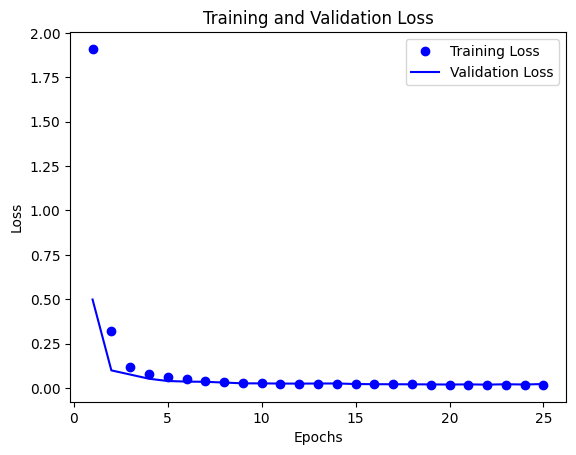

In [94]:
# Plotting
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
batsman_six.head()

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
3,28,6,0.858156,7,4,0.205944,0.333333
11,103,6,0.687943,7,4,0.196517,0.555556
13,140,6,0.000000,7,1,0.000000,0.000000
53,4,8,0.397163,0,1,0.223650,0.333333
57,21,8,0.163121,0,4,0.230978,0.222222


In [96]:
# Function to predict most six for batsmen
def predict_six_for_batsmen(model, batsman_six, scaler, sequence_length):
    selected_sequences = []
    for batsman in batsman_six['striker'].unique().tolist():
        batsman_data = batsman_six[batsman_six['striker'] == batsman]
        batsman_sequence = batsman_data.iloc[-sequence_length:, :-1].values
        predicted_six = model.predict(np.array([batsman_sequence]))

        avg_values = batsman_data.mean()
        predicted_row = pd.DataFrame({
            'striker': [batsman],
            'batting_team': [int(avg_values['batting_team'])],
            'Num_Balls_Played': [int(avg_values['Num_Balls_Played'])],
            'wicket_type': [int(avg_values['wicket_type'])],
            'venue' : [int(avg_values['venue'])],
            'Strike_Rate': [avg_values['Strike_Rate']],
            'Total_Six': int(predicted_six[0]),
        })

        print(predicted_row)
        batsman_six = pd.concat([batsman_six, predicted_row], ignore_index=True)

    batsman_six.sort_values(by='striker', inplace=True)

    return batsman_six

In [97]:
pred = predict_six_for_batsmen(model, batsman_six, scaler, sequence_length)

1/1 [==============================] - 0s 207ms/step
   striker  batting_team  Num_Balls_Played  wicket_type  venue  Strike_Rate  \
0       28             6                 0            2      5     0.112626   

   Total_Six  
0          0  
1/1 [==============================] - 0s 25ms/step
   striker  batting_team  Num_Balls_Played  wicket_type  venue  Strike_Rate  \
0      103             6                 0            1      5     0.112271   

   Total_Six  
0          0  
1/1 [==============================] - 0s 26ms/step
   striker  batting_team  Num_Balls_Played  wicket_type  venue  Strike_Rate  \
0      140             6                 0            0      5     0.103251   

   Total_Six  
0          0  
1/1 [==============================] - 0s 25ms/step
   striker  batting_team  Num_Balls_Played  wicket_type  venue  Strike_Rate  \
0        4             8                 0            1      4     0.275258   

   Total_Six  
0          0  
1/1 [==============================

In [98]:
pred

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
101,1,1,0.007092,4,4,0.041667,0.000000
147,1,1,0.000000,0,4,0.166667,0.000000
168,1,1,0.014184,3,0,0.000000,0.000000
10,1,1,0.148936,5,1,0.064336,0.000000
226,1,1,0.000000,2,2,0.076747,0.000000
...,...,...,...,...,...,...,...
188,140,6,0.269504,3,1,0.105566,0.111111
95,140,6,0.446809,5,1,0.106769,0.333333
2,140,6,0.000000,7,1,0.000000,0.000000
218,140,6,0.000000,5,0,0.103251,0.000000


In [99]:
# Assuming df_new is the DataFrame with transformed values
for col in le_cols:
    pred[col] = pred[col].map({v: k for k, v in le_classes[col].items()})
pred[scale_cols] = scaler.inverse_transform(pred[scale_cols])

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
101,A Zampa,Australia,2.0,"M Chinnaswamy Stadium, Bengaluru",none,25.000000,0.0
147,A Zampa,Australia,1.0,"Arun Jaitley Stadium, Delhi",none,100.000000,0.0
168,A Zampa,Australia,3.0,"Himachal Pradesh Cricket Association Stadium, ...",bowled,0.000000,0.0
10,A Zampa,Australia,22.0,"MA Chidambaram Stadium, Chepauk, Chennai",caught,38.601364,0.0
226,A Zampa,Australia,1.0,"Eden Gardens, Kolkata",caught and bowled,46.048023,0.0


In [107]:
pred.head()

,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
109,MR Marsh,Australia,111.0,"M Chinnaswamy Stadium, Bengaluru",caught,98.115586,9.0
102,DA Warner,Australia,131.0,"M Chinnaswamy Stadium, Bengaluru",caught,105.890305,9.0
142,H Klaasen,South Africa,52.0,"Wankhede Stadium, Mumbai",caught,140.171538,8.0
150,GJ Maxwell,Australia,44.0,"Arun Jaitley Stadium, Delhi",caught,200.961136,8.0
145,Q de Kock,South Africa,142.0,"Wankhede Stadium, Mumbai",caught,100.745704,7.0


In [100]:
pred.sort_values(by = ['Total_Six'],ascending = False,inplace = True)

In [109]:
total_six_by_batsman = pred.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()

In [110]:
total_six_by_batsman.sort_values(by = ['Total_Six'],ascending = False,inplace = True)
total_six_by_batsman.head()

,striker,batting_team,Total_Six
39,RG Sharma,India,20.0
5,DA Warner,Australia,19.0
36,Q de Kock,South Africa,18.0
11,H Klaasen,South Africa,17.0
4,DA Miller,South Africa,14.0


So by this, our model predicts that after Semis, Rohit Sharma will be the highest Six-Hitter with 20 sixes.

---

## Matches

Here, in the initial version, I am getting high losses as I didn't get the time to optimise my model.

In [2]:
match = pd.read_csv('/kaggle/input/icc-mens-world-cup-2023/matches.csv')
match.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [3]:
match.isna().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        16
winner_wickets     16
match_type          0
dtype: int64

In [4]:
match['reserve_umpire'] = match.reserve_umpire.fillna('unknown')
match['winner_runs'] = match.winner_runs.fillna(0)
match['winner_wickets'] = match.winner_wickets.fillna(0)

In [5]:
match.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0.0,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,0.0,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,0.0,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,0.0,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,0.0,6.0,Group


In [6]:
odi_data = pd.read_csv('/kaggle/input/odi-matches-historical-data-since-1971/odi_Matches_Data.csv')
odi_data.head()

,ODI Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,488,65425,Australia Vs New Zealand 4Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-07,ODI,2.0,Australia,1572.0,...,RC Bailhache,NaN,Australia,bat,Australia,Australia won by 6 runs,1795.0,"['1767', '1793', '1754', '1572', '1871', '1795...","['1550', '1863', '1861', '1669', '1698', '1846...",[]
1,492,65428,New Zealand Vs Sri Lanka 7Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-12,ODI,5.0,New Zealand,1698.0,...,SG Randell,NaN,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 4 wickets (with 21 balls rema...,1810.0,"['1777', '1550', '1698', '1669', '1861', '1846...","['1810', '1864', '1789', '1762', '1666', '1664...",[]
2,495,65431,Australia Vs New Zealand 10Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-17,ODI,5.0,New Zealand,1698.0,...,AR Crafter,NaN,Australia,bowl,Australia,Australia won by 5 wickets (with 64 balls rema...,1795.0,"['1550', '1863', '1698', '1669', '1407', '1790...","['1793', '1767', '1773', '1754', '1871', '1795...",['1790']
3,496,65432,Australia Vs Sri Lanka 11Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-19,ODI,8.0,Sri Lanka,1664.0,...,TA Prue,NaN,Australia,bowl,Australia,Australia won by 3 wickets (with 3 balls remai...,1871.0,"['1810', '1864', '1789', '1753', '1762', '1666...","['1767', '1793', '1754', '1871', '1795', '1572...",['1753']
4,508,64326,New Zealand Vs England 3Rd Odi,60882.0,England tour of New Zealand - 1988 (1987/88),1988-03-16,ODI,1.0,England,1543.0,...,SJ Woodward,NaN,New Zealand,bowl,New Zealand,New Zealand won by 7 wickets (with 21 balls re...,1550.0,"['1758', '1629', '1770', '1850', '1543', '1865...","['1550', '1883', '1863', '1882', '1777', '1918...",['1883']


In [7]:
odi_data.columns

Index(['ODI Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name',
       'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)',
       'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2',
       'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner',
       'Match Result Text', 'MOM Player', 'Team1 Playing 11',
       'Team2 Playing 11', 'Debut Players'],
      dtype='object')

In [8]:
cols = ['Match Date', 'Team1 Name', 'Team2 Name', 'Match Venue (City)', 'Match Venue (Country)', 'Toss Winner', 'Toss Winner Choice','Match Winner']

In [9]:
odi = odi_data[cols]

In [10]:
odi['winner_runs'] = odi_data['Match Result Text'].str.extract(r'(\d+) runs', expand=False)
odi['winner_wickets'] = odi_data['Match Result Text'].str.extract(r'(\d+) wickets', expand=False)

# Convert the columns to integers
odi['winner_runs'] = pd.to_numeric(odi['winner_runs'], errors='coerce')
odi['winner_wickets'] = pd.to_numeric(odi['winner_wickets'], errors='coerce')

odi.head()

,Match Date,Team1 Name,Team2 Name,Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner,winner_runs,winner_wickets
0,1988-01-07,Australia,New Zealand,Melbourne,Australia,Australia,bat,Australia,6.0,NaN
1,1988-01-12,New Zealand,Sri Lanka,Hobart,Australia,Sri Lanka,bowl,Sri Lanka,NaN,4.0
2,1988-01-17,New Zealand,Australia,Brisbane,Australia,Australia,bowl,Australia,NaN,5.0
3,1988-01-19,Sri Lanka,Australia,Sydney,Australia,Australia,bowl,Australia,NaN,3.0
4,1988-03-16,England,New Zealand,Napier,New Zealand,New Zealand,bowl,New Zealand,NaN,7.0


In [11]:
odi = odi.rename(columns={'Match Date': 'date', 'Team1 Name': 'team1', 'Team2 Name': 'team2', 'Match Venue (City)': 'city', 'Match Venue (Country)': 'country', 'Toss Winner':'toss_winner',
           'Toss Winner Choice': 'toss_decision', 'Match Winner': 'winner'})

In [12]:
odi['winner_runs'] = odi.winner_runs.fillna(0)
odi['winner_wickets'] = odi.winner_wickets.fillna(0)
odi['toss_decision'] = odi['toss_decision'].replace('bowl', 'field')
odi

,date,team1,team2,city,country,toss_winner,toss_decision,winner,winner_runs,winner_wickets
0,1988-01-07,Australia,New Zealand,Melbourne,Australia,Australia,bat,Australia,6.0,0.0
1,1988-01-12,New Zealand,Sri Lanka,Hobart,Australia,Sri Lanka,field,Sri Lanka,0.0,4.0
2,1988-01-17,New Zealand,Australia,Brisbane,Australia,Australia,field,Australia,0.0,5.0
3,1988-01-19,Sri Lanka,Australia,Sydney,Australia,Australia,field,Australia,0.0,3.0
4,1988-03-16,England,New Zealand,Napier,New Zealand,New Zealand,field,New Zealand,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...
4690,2023-11-03,Netherlands,Afghanistan,Lucknow,India,Netherlands,bat,Afghanistan,0.0,7.0
4691,2023-11-04,New Zealand,Pakistan,Bengaluru,India,Pakistan,field,Pakistan,21.0,0.0
4692,2023-11-04,Australia,England,Ahmedabad,India,England,field,Australia,33.0,0.0
4693,2023-11-05,India,South Africa,Kolkata,India,India,bat,India,243.0,0.0


In [13]:
odi['date'] = pd.to_datetime(odi['date'])

In [91]:
odi = odi.sort_values(by='date')

In [92]:
odi.isna().sum()

date              0
team1             0
team2             0
city              0
country           0
toss_winner       0
toss_decision     0
winner            0
winner_runs       0
winner_wickets    0
dtype: int64

In [93]:
odi.dropna(inplace=True)

In [94]:
odi['day'] = odi['date'].dt.day
odi['month'] = odi['date'].dt.month
odi['year'] = odi['date'].dt.year

In [95]:
# Features for Winner Prediction
features = ['day', 'month','year', 'team1', 'team2', 'city', 'country', 'toss_winner', 'toss_decision']

# Target (Winner only first)
# target = ['winner', 'winner_runs', 'winner_wickets']
target = ['winner']

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [97]:
# Encode categorical columns
label_encoder = LabelEncoder()
categorical_features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'country', 'winner']
for feature in categorical_features:
    odi[feature] = label_encoder.fit_transform(odi[feature])

In [98]:
X = odi[features]
y = odi[target]

In [99]:
X

,day,month,year,team1,team2,city,country,toss_winner,toss_decision
10,5,1,1971,8,3,104,0,2,1
11,24,8,1972,3,8,102,3,2,0
12,26,8,1972,8,3,100,3,2,1
13,28,8,1972,3,8,17,3,7,1
14,11,2,1973,18,21,38,13,20,1
...,...,...,...,...,...,...,...,...,...
4690,3,11,2023,17,0,101,5,16,0
4691,4,11,2023,18,21,14,5,20,1
4692,4,11,2023,3,8,3,5,7,1
4693,5,11,2023,11,23,91,5,10,0


In [100]:
y

,winner
10,3
11,7
12,3
13,7
14,17
...,...
4690,0
4691,20
4692,3
4693,10


In [101]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

In [113]:
X_train.columns

Index(['day', 'month', 'year', 'team1', 'team2', 'city', 'country',
       'toss_winner', 'toss_decision'],
      dtype='object')

In [189]:
model = Sequential()

In [190]:
model.add(LSTM(units=40, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [191]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.004), loss='binary_crossentropy', metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 40)                8000      
                                                                 
 dense_59 (Dense)            (None, 16)                656       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_60 (Dense)            (None, 8)                 136       
                                                                 
 dropout_20 (Dropout)        (None, 8)                 0         
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,801
Trainable params: 8,801
Non-train

In [193]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 3s 10ms/step - loss: -24754.9707 - accuracy: 0.0024 - val_loss: -137775.5625 - val_accuracy: 0.0000e+00
Epoch 2/10
90/90 [==============================] - 0s 5ms/step - loss: -1508449.0000 - accuracy: 3.4831e-04 - val_loss: -4975944.5000 - val_accuracy: 0.0000e+00
Epoch 3/10
90/90 [==============================] - 0s 5ms/step - loss: -17042114.0000 - accuracy: 3.4831e-04 - val_loss: -38217224.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
90/90 [==============================] - 0s 5ms/step - loss: -84761592.0000 - accuracy: 3.4831e-04 - val_loss: -157749488.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
90/90 [==============================] - 0s 5ms/step - loss: -280465760.0000 - accuracy: 3.4831e-04 - val_loss: -450023840.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
90/90 [==============================] - 0s 5ms/step - loss: -679757184.0000 - accuracy: 3.4831e-04 - val_loss: -1017307584.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
90/90 [==

In [194]:
# Reshape the test data
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

29/29 [==============================] - 0s 3ms/step - loss: -8557065216.0000 - accuracy: 0.0000e+00
Test Loss: -8557065216.0
Test Accuracy: 0.0
